<h1><center><b>CLASIFICACIÓN DE MÚSICA POR GÉNERO</b></center></h1>
<h3><center><b>MACHINE LEARNING</b></center></h3>



Con el objetivo de encontrar un modelo capaz de predeci si una canción pertenece a los géneros *Jazz y Blues* o a las géneros "*soul and reggae*", a continuación se presenta el desarrollo de un modelo de red neuronal que predecirá el género de una canción dentro de las categorías binarias mencionadas anteriormente del dataset **MSD genre dataset**. Este Dataset, cuenta con datos correspondientes a duración, timbre, tempo, nota clave,etc. <br>

Una consideración que se contemplo fue excluir de nuestro dataset las variables "track_id" y "artist_name" debido a que estas variables categóricas no identifican el género musical de la canción. De igual forma, se excluyeron todas las canciones que no pertenecieran a los géneros "*Jazz y Blues*" o "*Soul and reggae*".

<font color=”blue” size="2"> Para verificar el funcionamiento del proyecto por favor cargar el archivo msd_genre_dataset.txt, para esto pueden utilizar la siguiente celda   </font>

In [ ]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving msd_genre_dataset.txt to msd_genre_dataset (1).txt


<font color=”blue” size="2"> Setup para el funcionamiento </font>

## **Importando las librerías necesarias para el reto**<a name="id3"></a>

En esta sección, se importan todas las librerías utilizadas para la realización del reto. 

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
import math
from sklearn.utils import resample

from tqdm.auto import tqdm

from sklearn.model_selection import (train_test_split, ShuffleSplit, 
                                     cross_val_score, GridSearchCV)

from sklearn.metrics import (precision_score, recall_score, confusion_matrix, 
                             accuracy_score, f1_score, roc_curve, 
                             precision_recall_curve)
%matplotlib inline

### **Carga de Datos**

En esta sección se procede a cargar los datos del archivo de texto y se modifica eliminando las primeras filas del documento ya que es el "Header".

In [ ]:
PreFile= open('/content/msd_genre_dataset.txt','r')
file= PreFile.readlines()
del file[0:9]


with open("final.csv", "w") as textobj:
        for n in file:
            textobj.write(n)

dataset = pd.read_csv('final.csv')
dataset=dataset.rename(columns={'%genre':'genre'})
dataset.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


## **Preparación de los Datos**

Para realizar el preprocesamiento de datos se procede a seleccionar las canciones que pertenezcan a los géneros mencionados anteriormente.

In [ ]:
FullData1= dataset[dataset['genre']=="jazz and blues"]
FullData2= dataset[dataset['genre']=="soul and reggae"]
FullStudyData= pd.concat([FullData1,FullData2])
FullStudyData=FullStudyData.reset_index()
del FullStudyData['index']
print(FullStudyData)

                genre            track_id  ... var_timbre11 var_timbre12
0      jazz and blues  TRJBLUX12903CE16EC  ...   261.850703   240.834177
1      jazz and blues  TRDPDLX12903CE16F2  ...   261.643570   332.356536
2      jazz and blues  TRMWVBM128F42374DA  ...   481.149049   442.663136
3      jazz and blues  TRMLIWL128F42374DE  ...   250.545027   348.842236
4      jazz and blues  TRGFUVB128F42374E1  ...   262.670577   272.634634
...               ...                 ...  ...          ...          ...
8345  soul and reggae  TRGYRMA128E078FC55  ...   641.508417   395.121718
8346  soul and reggae  TRZZFQW128E078FC5A  ...   504.899788   350.913794
8347  soul and reggae  TRAMYBB128F424D86D  ...   538.895856   313.775934
8348  soul and reggae  TRABWFM128F424D86A  ...   598.054091   443.893807
8349  soul and reggae  TREBGAA128E078FC52  ...   531.850198   607.215961

[8350 rows x 34 columns]


Luego verificamos la cantidad de datos existentes para cada uno de los géneros mencionados. A pesar que se tenga una cantidad similar de los datos, más adelante se procederá a tomar la misma cantidad de datos de cada género y evitar un desbalance durante el entrenamiento.

In [ ]:
FullStudyData["genre"].value_counts().sort_index()

jazz and blues     4334
soul and reggae    4016
Name: genre, dtype: int64

Como se mencionó al inicio, se procede a eliminar las distintas variables no relevantes para el entrenamiento, y se toma la salida del modelo el género.

In [ ]:
Full_Y_Data =FullStudyData["genre"]
del FullStudyData['genre']
del FullStudyData['track_id']
del FullStudyData['artist_name']
del FullStudyData['title']
print(Full_Y_Data)

0        jazz and blues
1        jazz and blues
2        jazz and blues
3        jazz and blues
4        jazz and blues
             ...       
8345    soul and reggae
8346    soul and reggae
8347    soul and reggae
8348    soul and reggae
8349    soul and reggae
Name: genre, Length: 8350, dtype: object


## **Train Set,  Test Set**

En esta sección, se procede a separar los datos. Se tomó el 80% de los datos para entrenamiento y un 20% para probar el modelo. La cantidad de datos utilizados para entrenamiento se puede observar a continuación:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FullStudyData,
                                                    Full_Y_Data,
                                                    test_size=0.2,
                                                    random_state=1234)

y_train.value_counts().sort_index()

jazz and blues     3468
soul and reggae    3212
Name: genre, dtype: int64

## **Desbalanceo de clases**

Debido a que la cantidad de datos existente para cada género no son iguales, se procederá a balancear la cantidad de datos tomando la misma cantidad para cada género.

In [ ]:
total = pd.concat([y_train,X_train], axis=1)


total.sort_index(inplace=True)

FullTrainData1= total[total['genre']=="soul and reggae"]
FullTrainData2= total[total['genre']=="jazz and blues"]

FullTrainData2 = resample(FullTrainData2, replace=False,
                                 n_samples=len(FullTrainData1), 
                                 random_state=1234)

FullTrainData2.sort_index(inplace=True)

totalbalanced = FullTrainData1.append(FullTrainData2)
print(totalbalanced)



                genre  loudness  ...  var_timbre11  var_timbre12
4334  soul and reggae   -10.053  ...    504.924439    256.438449
4335  soul and reggae    -9.147  ...    574.946830    202.950315
4337  soul and reggae   -10.499  ...    496.256041    332.791504
4338  soul and reggae   -11.380  ...    352.441561    202.702421
4340  soul and reggae    -7.787  ...    523.406259    299.042235
...               ...       ...  ...           ...           ...
4328   jazz and blues   -20.476  ...    358.954473    829.700899
4329   jazz and blues    -8.653  ...    142.711971    232.783892
4330   jazz and blues   -14.888  ...    142.749853    579.211215
4332   jazz and blues   -19.253  ...    207.371239    351.108268
4333   jazz and blues   -19.217  ...    164.269930    241.251098

[6424 rows x 31 columns]


In [ ]:
y_train =totalbalanced["genre"]
del totalbalanced['genre']

X_train= totalbalanced

X_train.describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000
mean,-12.647037,120.228344,3.631227,5.208904,0.612235,297.896149,39.076365,-14.619175,-1.560525,3.328385,4.252270,-4.071827,-2.178518,-0.157555,0.904042,2.274618,-1.179401,2.406670,38.508869,2790.207283,2789.763556,2006.225912,1032.735195,1157.647943,768.515828,611.696963,468.968029,385.058702,353.600217,370.598854
std,5.765878,36.843608,1.246098,3.574689,0.487278,158.639165,6.504536,54.242496,38.906826,17.345520,22.047676,13.010059,14.949813,8.780333,11.125145,6.287861,4.860879,8.425629,20.518795,1610.260025,1492.534488,1074.798370,447.350943,587.050268,317.642310,291.197441,219.538273,158.219307,170.221942,178.374834
min,-41.038000,0.000000,0.000000,0.000000,0.000000,1.201180,8.282830,-247.238079,-176.974029,-96.895243,-108.027906,-50.638953,-81.217508,-64.920552,-85.759614,-29.016729,-46.202360,-55.687861,1.552760,319.123937,289.798025,184.377732,149.696791,91.148900,120.953785,97.290693,94.128684,68.044507,49.275323,65.025144
25%,-15.864250,93.409500,3.000000,2.000000,0.000000,211.284447,35.261855,-46.013676,-24.688900,-7.029443,-8.525267,-12.877804,-10.915174,-5.090554,-5.204997,-1.758847,-3.948213,-2.696842,24.374216,1761.884800,1828.346106,1285.374474,735.551674,749.748108,549.405048,414.933882,325.460138,276.389525,233.262701,266.432432
50%,-11.612000,116.465000,4.000000,5.000000,1.000000,262.556280,40.129811,-7.544781,-0.490930,2.517845,4.534349,-5.193695,-2.214207,-0.117192,1.535650,2.272523,-1.021966,2.325403,34.801134,2401.807440,2489.002496,1765.485979,957.523793,1048.212319,718.577909,550.056608,422.560321,356.463453,321.919955,334.049812
75%,-8.338750,143.824750,4.000000,8.000000,1.000000,344.384853,43.867065,22.028306,21.347940,12.846353,17.613140,3.238165,6.803009,5.000172,7.704495,6.342328,1.855217,7.306137,48.136136,3359.738637,3351.837209,2455.530776,1242.835140,1435.572136,925.270788,743.735176,556.490708,465.654356,438.555308,424.963374
max,-0.278000,250.120000,7.000000,11.000000,1.000000,2873.808530,54.264115,368.413738,268.371590,106.820000,126.060726,100.846598,77.515336,60.334705,56.727201,38.294126,20.172152,53.540906,285.886371,20565.107212,18170.312109,11636.309435,5935.409392,7191.936920,4851.017437,4057.268420,2734.244639,1794.267857,2049.996543,2417.601217


In [ ]:
y_train.value_counts().sort_index()

jazz and blues     3212
soul and reggae    3212
Name: genre, dtype: int64

Una vez se tenga la misma cantidad de datos para cada género, se procede identificar el género "jazz and blues" como 0 y "soul and reggae" como 1, de esta forma, ya todo el set de datos queda balanceado y la salida binarizada.

In [ ]:
y_train=y_train.replace('jazz and blues',0)
y_train=y_train.replace('soul and reggae',1)

y_test=y_test.replace('jazz and blues',0)
y_test=y_test.replace('soul and reggae',1)


print(y_test)

4216    0
538     0
8234    1
7051    1
3759    0
       ..
8160    1
4083    0
593     0
4462    1
8340    1
Name: genre, Length: 1670, dtype: int64


## **Modelamiento**

En esta sección, se procede a crear el primer modelo de perceptrón multicapa. Este primer modelo tendrá una única capa escondida con 15 neuronas y la función de activación será la "Relu".

In [ ]:
stsc_X = StandardScaler()
X_trainscaled=stsc_X.fit_transform(X_train)
X_testscaled=stsc_X.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(15), activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

## **Predicción y Validación**

Una vez entrenado el modelo, se procede a realizar la predicción de los datos y evaluar su desempeño. El *Accuracy Score* indica el porcentaje de aciertos totales realizados en la predicción; este indicador será el principal criterio que utilizaremos a la hora de evaluar e desempeño del modelo. El *Recall Score* representa la proporción de predicciones acertadas de 1. El *Precision Score* representa la habilidad de **no** clasificar como 1 a datos que en verdad son 0.

In [ ]:
y_pred=clf.predict(X_testscaled)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred)*100,2),'%')
print('Recall Score: ', round(recall_score(y_test, y_pred)*100,2),'%')
print('Precision Score: ', round(precision_score(y_test, y_pred)*100,2),'%')


Accuracy Score:  84.37 %
Recall Score:  85.45 %
Precision Score:  82.67 %


Ahora, procedemos a determinar la matriz de confusión en la cual se pueden observar cuantos 0 fueron clasificados como 0, cuantos 0 fueron clasificados como 1, cuantos 1 fueron clasificados como 0 y cuantos 1 fueron clasificados como 1. Lo mejor posible es que la diagonal tenga la mayor cantidad de datos y las otras dos esquinas sean 0.

In [ ]:
conf_matrix22 = confusion_matrix(y_test, y_pred)
pd.DataFrame(conf_matrix22)

,0,1
0,722,144
1,117,687


Se procede a normalizar la matriz para así poder comparar los resultados obtenidos para la clasificación de 0 y de 1. Los valores que tendremos en cuenta son aquellos que representaron errores, es decir, cuando los 0 se clasificaron como 1 y los 1 se clasificaron como 0.

In [ ]:
norm_conf_mat22 = conf_matrix22 / conf_matrix22.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat22, 0)
pd.DataFrame(norm_conf_mat22)

,0,1
0,0.000000,0.166282
1,0.145522,0.000000


Ahora observamos la matriz normalizada en una forma gráfica, mientras el recuadro sea más oscuro, será un mejor valor y mientras más blanco sea, será peor. En este caso, se obtuvo un 16,63% de 0 clasificados como 1 y un 14,55% de 1 clasificados como 0.

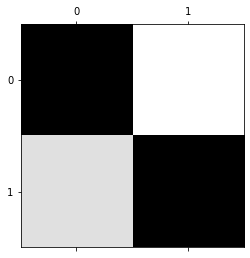

In [ ]:
conf_matrix22 = confusion_matrix(y_test, y_pred)
pd.DataFrame(conf_matrix22)
norm_conf_mat22 = conf_matrix22 / conf_matrix22.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat22, 0)
plt.matshow(norm_conf_mat22, cmap="gray")
plt.grid(0)
plt.show()

Con el fin de realizar multipels pruebas se realizo:

### **Pruebas de mejor Modelo**

En esta sección, se procederá a probar distintos modelos de 1 capa escondida, variando el número de neuronas, la función de activación y el *solver*. En otras palabras, se realoizará un análisis de sensibilidad ante cada uno de estos factores.

Inicialmente, empezaremos analizando el desempeño con distintas neuronas en pasos de 5 en 5 utilizando la función de activación Relu.

In [ ]:
rec_scores = {}
prec_scores = {}

for k in tqdm(range(5, 31, 5)):
  clf = MLPClassifier(hidden_layer_sizes=(k),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
  y_pred=clf.predict(X_testscaled)
  rec_scores[k] = recall_score(y_test, y_pred, average="weighted")
  prec_scores[k] = precision_score(y_test, y_pred, average="weighted")
  print(f"------Number of Neurons: {k}--------")
  print(f"Recall Score: {rec_scores[k]}")
  print(f"Precision Score: {prec_scores[k]}")



------Number of Neurons: 5--------
Recall Score: 0.8287425149700599
Precision Score: 0.8306492613395088
------Number of Neurons: 10--------
Recall Score: 0.8526946107784431
Precision Score: 0.8528461261799309
------Number of Neurons: 15--------
Recall Score: 0.8437125748502994
Precision Score: 0.8442595830528845
------Number of Neurons: 20--------
Recall Score: 0.8407185628742515
Precision Score: 0.8415242719994196
------Number of Neurons: 25--------
Recall Score: 0.8580838323353294
Precision Score: 0.8585625940845103
------Number of Neurons: 30--------
Recall Score: 0.834131736526946
Precision Score: 0.834158203857462



In [ ]:
total_data = {
    "k": list(range(5, 31, 5)),
    "rec_scores": list(rec_scores.values()),
    "prec_scores": list(prec_scores.values())
}

total_df = pd.DataFrame(total_data)

En las gráficas presentadas a continuación, se puede observar que en el caso de 25 neuronas, se obtuvieron los mejores "Recall Score" y "Precision Score", con unos valores alrededor de 86%.

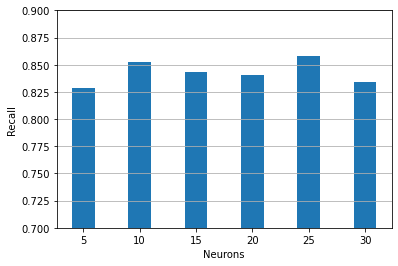

In [ ]:
plt.bar(total_df["k"], total_df["rec_scores"],width=2)
plt.ylim((0.7, 0.9))
plt.grid(which='major', axis='y')
plt.xlabel("Neurons")
plt.ylabel("Recall")
plt.show()

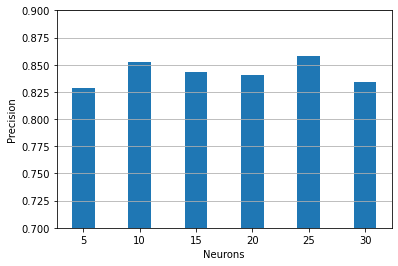

In [ ]:
plt.bar(total_df["k"], total_df["rec_scores"],width=2)
plt.ylim((0.7, 0.9))
plt.grid(which='major', axis='y')
plt.xlabel("Neurons")
plt.ylabel("Precision")
plt.show()

Ahora se procede a realizar el mismo análisis con la excepción de la función de activación, la cual será "Tanh" en este caso.

In [ ]:
rec_scores = {}
prec_scores = {}

for k in tqdm(range(5, 31, 5)):
  clf = MLPClassifier(hidden_layer_sizes=(k),activation="tanh" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
  y_pred=clf.predict(X_testscaled)
  rec_scores[k] = recall_score(y_test, y_pred, average="weighted")
  prec_scores[k] = precision_score(y_test, y_pred, average="weighted")
  print(f"------Number of Neighbors: {k}--------")
  print(f"Recall Score: {rec_scores[k]}")
  print(f"Precision Score: {prec_scores[k]}")

------Number of Neighbors: 5--------
Recall Score: 0.829940119760479
Precision Score: 0.8304566254753831
------Number of Neighbors: 10--------
Recall Score: 0.8395209580838323
Precision Score: 0.8401025285577185
------Number of Neighbors: 15--------
Recall Score: 0.8479041916167664
Precision Score: 0.8483539375859456
------Number of Neighbors: 20--------
Recall Score: 0.8359281437125748
Precision Score: 0.8359650710753724
------Number of Neighbors: 25--------
Recall Score: 0.8215568862275449
Precision Score: 0.8215746202659473
------Number of Neighbors: 30--------
Recall Score: 0.8107784431137725
Precision Score: 0.8115797721153983



In [ ]:
total_data = {
    "k": list(range(5, 31, 5)),
    "rec_scores": list(rec_scores.values()),
    "prec_scores": list(prec_scores.values())
}

total_df = pd.DataFrame(total_data)

En las gráficas presentadas a continuación, se puede observar que en el caso de 15 neuronas, se obtuvieron los mejores "Recall Score" y "Precision Score", con unos valores alrededor de 85%.

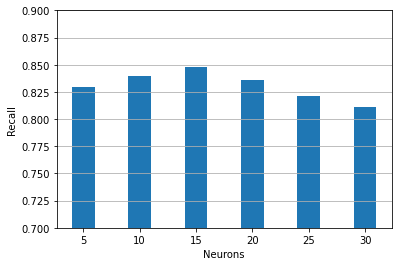

In [ ]:
plt.bar(total_df["k"], total_df["rec_scores"],width=2)
plt.ylim((0.7, 0.9))
plt.grid(which='major', axis='y')
plt.xlabel("Neurons")
plt.ylabel("Recall")
plt.show()

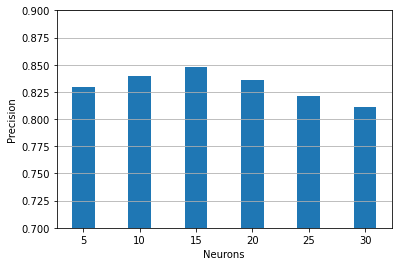

In [ ]:
plt.bar(total_df["k"], total_df["rec_scores"],width=2)
plt.ylim((0.7, 0.9))
plt.grid(which='major', axis='y')
plt.xlabel("Neurons")
plt.ylabel("Precision")
plt.show()

En base a los resultados obtenidos anteriormente, se puede determinar que la función de activación Relu tuvo un mejor desempeño que la función de activación Tanh. Ahora, haremos el mismo análisis, pero, se utilizara la función de activación Relu y se cambiará el *solver*.

In [ ]:
rec_scores = {}
prec_scores = {}

for k in tqdm(range(5,31, 5)):
  clf = MLPClassifier(hidden_layer_sizes=(k),activation="relu",random_state=1, max_iter=2000,solver='sgd').fit(X_trainscaled, y_train)
  y_pred=clf.predict(X_testscaled)
  rec_scores[k] = recall_score(y_test, y_pred, average="weighted")
  prec_scores[k] = precision_score(y_test, y_pred, average="weighted")
  print(f"------Number of k: {k}--------")
  print(f"Recall Score: {rec_scores[k]}")
  print(f"Precision Score: {prec_scores[k]}")

------Number of k: 5--------
Recall Score: 0.8353293413173652
Precision Score: 0.8366330998195651
------Number of k: 10--------
Recall Score: 0.848502994011976
Precision Score: 0.8489223741108367
------Number of k: 15--------
Recall Score: 0.829940119760479
Precision Score: 0.8300990799775293
------Number of k: 20--------
Recall Score: 0.8365269461077844
Precision Score: 0.8370103458144406
------Number of k: 25--------
Recall Score: 0.8431137724550898
Precision Score: 0.8440895207072858
------Number of k: 30--------
Recall Score: 0.8455089820359282
Precision Score: 0.8456273015061979



En las valores obtenidos anteriormente, se puede observar que en el caso de 10 neuronas, se obtuvieron los mejores "Recall Score" y "Precision Score", con unos valores alrededor de 85%. Ahora cambiemos el *solver* y observemos los resultados.

In [ ]:
rec_scores = {}
prec_scores = {}

for k in tqdm(range(5,31, 5)):
  clf = MLPClassifier(hidden_layer_sizes=(k),activation="relu",random_state=1, max_iter=2000,solver='lbfgs').fit(X_trainscaled, y_train)
  y_pred=clf.predict(X_testscaled)
  rec_scores[k] = recall_score(y_test, y_pred, average="weighted")
  prec_scores[k] = precision_score(y_test, y_pred, average="weighted")
  print(f"------Number of k: {k}--------")
  print(f"Recall Score: {rec_scores[k]}")
  print(f"Precision Score: {prec_scores[k]}")

------Number of k: 5--------
Recall Score: 0.837125748502994
Precision Score: 0.8390493431741168
------Number of k: 10--------
Recall Score: 0.8437125748502994
Precision Score: 0.8440759535259766
------Number of k: 15--------
Recall Score: 0.8437125748502994
Precision Score: 0.8438487399326844


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


------Number of k: 20--------
Recall Score: 0.8281437125748503
Precision Score: 0.8283643041778945


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


------Number of k: 25--------
Recall Score: 0.8293413173652695
Precision Score: 0.829447942953776
------Number of k: 30--------
Recall Score: 0.818562874251497
Precision Score: 0.8188811552901003



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


En las valores obtenidos anteriormente, se puede observar que en el caso de 10 neuronas, se obtuvieron los mejores "Recall Score" y "Precision Score", con unos valores alrededor de 84%. Cabe destacar que algunos modelos con este *solver* no logro converger incluso aumentando el número de iteraciones a 3000. De igual forma, se puede observar que el *solver* "sgd" fue el qe obtuvo el mejor desempeño.

Para realizar una mejor búsqueda del modelo que presente un mejor desempeño, se realizará un *grid search* de estos factores en los que se evaluará alrededor de 25 neuronas (en esta cantidad se obtuvo el mejor desempeño) sobre la función de activación, el *solver* y el *learning rate*.


In [ ]:
grid_values = {'hidden_layer_sizes':[25],'activation': [ 'relu','tanh'],'solver':['adam','sgd'],'learning_rate':['constant','adaptive'], 'max_iter':[2000]}
clf = MLPClassifier()
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, )
grid_clf_acc.fit(X_trainscaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...e=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activati

De esta forma, el grid search, arroja que los mejores parámetros del modelo con 25 neuronas, son los siguientes:

In [ ]:
grid_clf_acc.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 25,
 'learning_rate': 'adaptive',
 'max_iter': 2000,
 'solver': 'sgd'}

Por último, se procede a realizar una validación cruzada sobre los datos de entrenamiento para obtener un promedio del mejor desempeño según *Accuracy* (predicciones correctas sobre predicciones totales) del modelo obtenido anteriormente.

In [ ]:
cross_val_score(grid_clf_acc, X_trainscaled, y_train, cv=4, scoring="accuracy")


array([0.76276463, 0.81755915, 0.84993773, 0.86176837])

In [ ]:
round(grid_clf_acc.best_score_*100,2)

0.8237891074826964

De esta forma, se obtiene que el mejor modelo de un perceptron multicapa con solo 1 capa escondida tiene 25 neuronas, con función de activación Relu, *solver* sgd y *learning rate* constante. El cual obtuvo un porcentaje de *Accuracy* de 82.38%

### **Punto 2**

Para este punto, se procedió a realizar exactamente el mismo proceso realizado en la sección anterior, con la diferencia de que se utilizarán más capas escondidas. Inicialmente se realizará un análisis con 2 capas escondidas y luego con 4 capas escondidas. Se realizarán una serie de pruebas y se observarán los resultados obtenidos en estas pruebas para tener una noción de que parámetros funcionan mejor. De igual forma, se realizará un *grid search* para obtener el mejor modelo al cual se le hará una validación cruzada con los datos de entrenamiento.

<br>


Se inicia utilizando 2 capas escondidas en las cuales se tendrá la misma cantidad de neuronas con pasos de 5 en 5.

In [ ]:
rec_scores = {}
prec_scores = {}

for k in tqdm(range(5, 31, 5)):
  clf = MLPClassifier(hidden_layer_sizes=(k,k),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
  y_pred=clf.predict(X_testscaled)
  rec_scores[k] = recall_score(y_test, y_pred, average="weighted")
  prec_scores[k] = precision_score(y_test, y_pred, average="weighted")
  print(f"------Number of k: {k}--------")
  print(f"Recall Score: {rec_scores[k]}")
  print(f"Precision Score: {prec_scores[k]}")

------Number of k: 5--------
Recall Score: 0.8389221556886227
Precision Score: 0.8396113162895765
------Number of k: 10--------
Recall Score: 0.8461077844311378
Precision Score: 0.8479872994745083
------Number of k: 15--------
Recall Score: 0.8377245508982036
Precision Score: 0.8387427806326269
------Number of k: 20--------
Recall Score: 0.8377245508982036
Precision Score: 0.8377727826929275
------Number of k: 25--------
Recall Score: 0.834131736526946
Precision Score: 0.8343502661648978
------Number of k: 30--------
Recall Score: 0.8131736526946107
Precision Score: 0.8133017175367055



Ahora se realizará el mismo proceso pero con 4 capas escondidas.

In [ ]:
rec_scores = {}
prec_scores = {}

for k in tqdm(range(5, 31, 5)):
  clf = MLPClassifier(hidden_layer_sizes=(k,k,k,k),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
  y_pred=clf.predict(X_testscaled)
  rec_scores[k] = recall_score(y_test, y_pred, average="weighted")
  prec_scores[k] = precision_score(y_test, y_pred, average="weighted")
  print(f"------Number of k: {k}--------")
  print(f"Recall Score: {rec_scores[k]}")
  print(f"Precision Score: {prec_scores[k]}")

------Number of k: 5--------
Recall Score: 0.8323353293413174
Precision Score: 0.8340129083035793
------Number of k: 10--------
Recall Score: 0.8251497005988024
Precision Score: 0.8257330025097591
------Number of k: 15--------
Recall Score: 0.8257485029940119
Precision Score: 0.826173888630112
------Number of k: 20--------
Recall Score: 0.8149700598802395
Precision Score: 0.8149622733960433
------Number of k: 25--------
Recall Score: 0.8101796407185629
Precision Score: 0.8112736678337784
------Number of k: 30--------
Recall Score: 0.8203592814371258
Precision Score: 0.8206047818280227



In [ ]:
total_data = {
    "k": list(range(5, 31, 5)),
    "rec_scores": list(rec_scores.values()),
    "prec_scores": list(prec_scores.values())
}

total_df = pd.DataFrame(total_data)

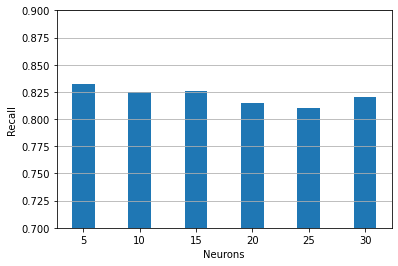

In [ ]:
plt.bar(total_df["k"], total_df["rec_scores"],width=2)
plt.ylim((0.7, 0.9))
plt.grid(which='major', axis='y')
plt.xlabel("Neurons")
plt.ylabel("Recall")
plt.show()

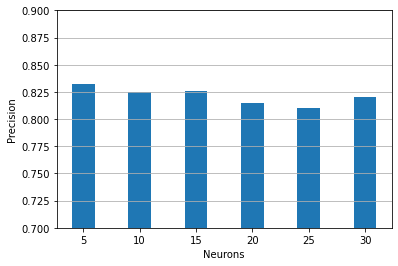

In [ ]:
plt.bar(total_df["k"], total_df["rec_scores"],width=2)
plt.ylim((0.7, 0.9))
plt.grid(which='major', axis='y')
plt.xlabel("Neurons")
plt.ylabel("Precision")
plt.show()

Ahora, en vista que los mejores resultados se hallaron en las neuronas, se plantea hacer el mismo análisis de 2 capas escondidas, con la diferencia de que en la primera capa siempre habran 5 neuronas y la segunda varía.

In [ ]:
rec_scores = {}
prec_scores = {}

for k in tqdm(range(5, 31, 5)):
  clf = MLPClassifier(hidden_layer_sizes=(5,k),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
  y_pred=clf.predict(X_testscaled)
  rec_scores[k] = recall_score(y_test, y_pred, average="weighted")
  prec_scores[k] = precision_score(y_test, y_pred, average="weighted")
  print(f"------Number of k: {k}--------")
  print(f"Recall Score: {rec_scores[k]}")
  print(f"Precision Score: {prec_scores[k]}")

------Number of k: 5--------
Recall Score: 0.8389221556886227
Precision Score: 0.8396113162895765
------Number of k: 10--------
Recall Score: 0.8311377245508982
Precision Score: 0.8311100720473411
------Number of k: 15--------
Recall Score: 0.8305389221556886
Precision Score: 0.8317397267735629
------Number of k: 20--------
Recall Score: 0.8365269461077844
Precision Score: 0.8368393514900677
------Number of k: 25--------
Recall Score: 0.8413173652694611
Precision Score: 0.842626535964109
------Number of k: 30--------
Recall Score: 0.8335329341317366
Precision Score: 0.8343375920272544



Luego, se hará un grid search con los mejores parámetros para cantidad de neuronas y cantidad de capas según los resultados obtenidos anteriormente para así observar el mejor modelo.

In [ ]:
grid_values = {'hidden_layer_sizes':[(15),(5,5),(5,15),(5,5,5,5)],'activation': [ 'relu','tanh'],'solver':['adam','sgd'],'learning_rate':['constant','adaptive'], 'max_iter':[2000]}
clf = MLPClassifier()
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, )
grid_clf_acc.fit(X_trainscaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

Siendo así, los mejores parámetros los siguientes:

In [ ]:
grid_clf_acc.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': 15,
 'learning_rate': 'adaptive',
 'max_iter': 2000,
 'solver': 'sgd'}

Ahora, se realizará una validación cruzada sobre el modelo encontrado anteriormente.

In [ ]:
cross_val_score(grid_clf_acc, X_trainscaled, y_train, cv=4, scoring="accuracy")
grid_clf_acc.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

0.8251892796101676

Finalmente, el mejor modelo encontrado entre el encontrado en el Punto 1 y el Punto 2 fue el primero. Ahora procederemos a entrenar dicho modelo y se observarán los criterios de desempeño explicados al inicio del informe. A continuación, se presenta el modelo obtenido junto con sus criterios de desempeño.

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(15),learning_rate= 'adaptive',activation="tanh" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred)*100,2),'%')
print('Recall Score: ', round(recall_score(y_test, y_pred)*100,2),'%')
print('Precision Score: ', round(precision_score(y_test, y_pred)*100,2),'%')

Accuracy Score:  84.13 %
Recall Score:  85.82 %
Precision Score:  82.05 %
